In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imgPlt
import os 
from tqdm import tqdm
%matplotlib inline
import matplotlib.image as mpimg

dirPath="../images/StereoCorrespondence/"
dirPath1='../images/StereoCorrespondence/'

## Question 2.1:Intensity based window matching 

### Helper functions

In [2]:
# Stacks the two stereo images 
def horStack(imgA,imgB):
    if imgA.shape[0]>=imgB.shape[0]:
        difLength=imgA.shape[0]-imgB.shape[0]
        imgA=imgA[:(imgA.shape[0]-difLength),:,:]
    
    else:
        difLength=imgB.shape[0]-imgA.shape[0]
        imgB=imgB[:(imgB.shape[0]-difLength),:,:]
    
    
    return np.hstack((imgA,imgB))

In [3]:
# Draw lines between the matched patches
def linesDraw(stereo_img,matches,patch_size):
    r,c,_ = stereo_img.shape
    
    for match in matches:
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (match[0][1]+patch_size//2,match[0][0]+patch_size//2)
        q = (match[1][1]+patch_size//2+c//2,match[1][0]+patch_size//2)
        lined_stereo_img = cv2.line(stereo_img,p,q,color,2)
        lined_stereo_img = cv2.circle(lined_stereo_img,p,5,color,-1)
        lined_stereo_img = cv2.circle(lined_stereo_img,q,5,color,-1)
    plt.figure(figsize=(18,18))
    plt.imshow(lined_stereo_img)
    plt.axis('off')
    plt.show()
    
# Draw matches between patches(two images)
def matchDraw(img1,img2,matches,ws=0):
    r,c,_ = img1.shape
    img3 = np.zeros((r,2*c,3))
    img3[:,:c,:] = img1
    img3[:,c:,:] = img2
    
    for match in matches:
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (match[0][1]+ws//2,match[0][0]+ws//2)
        q = (match[1][1]+c+ws//2,match[1][0]+ws//2)
        lined = cv2.line(img3,p,q,color,2)
        lined = cv2.circle(lined,p,5,color,-1)
        lined = cv2.circle(lined,q,5,color,-1)
    plt.figure(figsize=(18,18))
    
    plt.imshow(lined.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [4]:
# Normalized correlation function
def correlation(a,b):
    na = a-np.mean(a)
    na = na/(np.linalg.norm(na)+1)
    nb = b-np.mean(b)
    nb = nb/(np.linalg.norm(nb)+1)    
    corr = abs(np.dot(na,nb))
    return corr

# Intensity Window-based correlation function  
def bfWindCorr(img1,img2,patch_size,step,offset=0):
    r1,c1,c = img1.shape
    r2,c2,c = img2.shape
    matches = []
    for y1 in range(0,r1-patch_size+1,step):
        for x1 in range(0,c1-patch_size+1,step):
            best_diff = -1
            for y2 in range(0,r2-patch_size+1,step):
                for x2 in range(0,c2-patch_size+1,step):
                    a = img1[y1:y1+patch_size,x1:x1+patch_size,:].flatten()
                    b = img2[y2:y2+patch_size,x2:x2+patch_size,:].flatten()
                    diff = correlation(a,b)
                    if diff>best_diff:
                        best_diff = diff
                        best_match = np.array([[x1,y1+offset],[x2,y2+offset],diff])
            matches.append(best_match)
    return matches       

In [5]:
# image padding for correlation function. 
def resizeToSuit(image,windowSize):

    new =[]
    length=windowSize*((image.shape[0]//windowSize)+1)
    width=windowSize*((image.shape[1]//windowSize)+1)
    dim=(length,width)
    
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    
    return resized

### Question -1 Intensity based window Matching Results

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


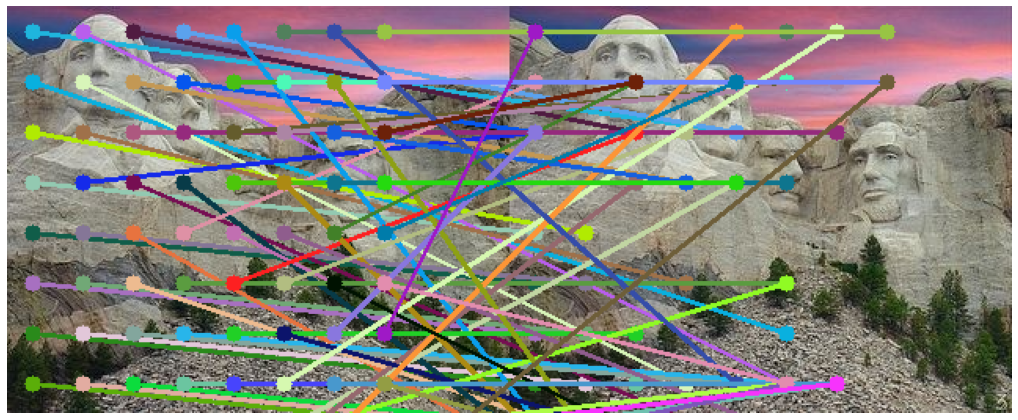

In [6]:
img1=cv2.cvtColor(cv2.imread(dirPath+'1_1.jpg'),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(dirPath+'1_2.jpg'),cv2.COLOR_BGR2RGB)

matches = bfWindCorr(img1,img2,32,32)
lined_im = matchDraw(img1,img2,matches,32)

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


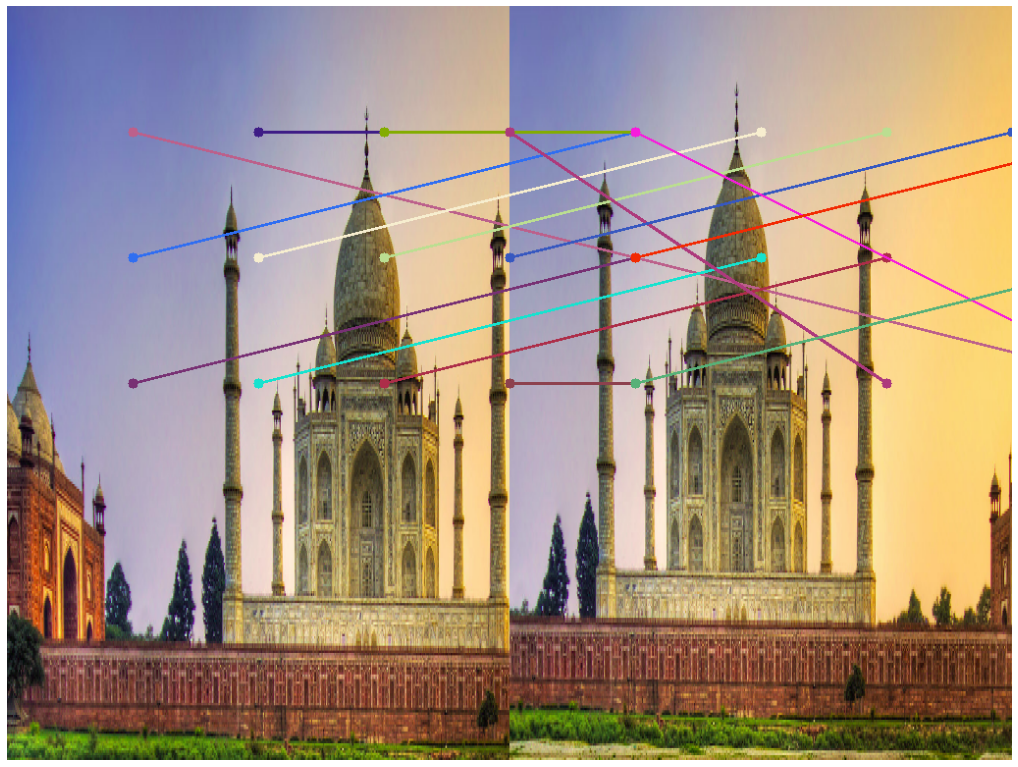

In [7]:
img1=cv2.cvtColor(cv2.imread(dirPath+'2_1.png'),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(dirPath+'2_2.png'),cv2.COLOR_BGR2RGB)
windowSize=256
img1=resizeToSuit(img1,windowSize)
img2=resizeToSuit(img2,windowSize)
matches = bfWindCorr(img1,img2,windowSize,128)
lined_im = matchDraw(img1,img2,matches,windowSize)

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


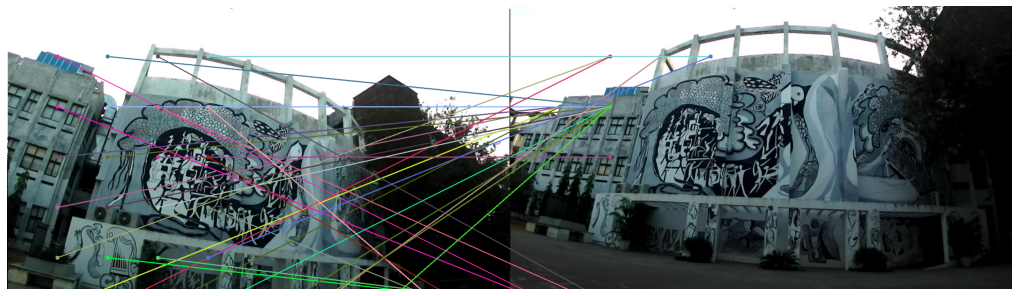

In [8]:
img1=cv2.cvtColor(cv2.imread(dirPath+'3_1.jpg'),cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(dirPath+'3_2.jpg'),cv2.COLOR_BGR2RGB)

matches = bfWindCorr(img1,img2,256,128)
lined_im = matchDraw(img1,img2,matches,256)

## Question 2.2 and 2.6 :  Drawing epipolar lines

In [9]:
# Draw matches between patches(two images)
def matchDraw(img1,img2,matches,ws=0):
    r,c,_ = img1.shape
    img3 = np.zeros((r,2*c,3))
    img3[:,:c,:] = img1
    img3[:,c:,:] = img2
    
    for match in matches:
        color = tuple(np.random.randint(0,255,3).tolist())
        p = (match[0][1]+ws//2,match[0][0]+ws//2)
        q = (match[1][1]+c+ws//2,match[1][0]+ws//2)
        lined = cv2.line(img3,p,q,color,2)
        lined = cv2.circle(lined,p,5,color,-1)
        lined = cv2.circle(lined,q,5,color,-1)
    plt.figure(figsize=(18,18))
    
    plt.imshow(lined.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [10]:
# Collects the matching coordinates in a list
def findMatchingCoords(p1, p2, matching_inds):
    pts1, pts2 = [], []
    for i in range(matching_inds.shape[0]):
        pts1.append(p1[matching_inds[i, 0]].pt)
        pts2.append(p2[matching_inds[i, 1]].pt)
    pts1 = np.array(pts1)
    pts2 = np.array(pts2)
    
    return pts1, pts2

In [11]:
# Function to detect the features 
def findFeatures(img):
    #function for detecting SIFT features
    
    sift = cv2.SIFT_create()
    points, descriptors = sift.detectAndCompute(img, None)
    
    return points, descriptors

In [12]:
# Matches the features between the stereo images using BFMatcher
def match(img1, img2):
    #function for matching two images
    
    #get features for each image
    p1, d1 = findFeatures(img1)
    p2, d2 = findFeatures(img2)
    
    #find nearest neighbours for each image
    matcher = cv2.BFMatcher()
    matches = matcher.knnMatch(d1, d2, k=2)
    
    #find good neighbours to be considered as matches
    top = []
    matching_inds = []
    for a, b in matches:
        if a.distance < 0.75*b.distance:
            top.append([a])
            matching_inds.append((a.queryIdx, a.trainIdx))
    
    return p1, d1, p2, d2, np.array(matching_inds), top

In [13]:
def convertInt2float(arr):
    tempList=[]
    for a in arr:
        tempList.append(np.int(a))
    
    return np.array(tempList)

In [14]:
# Fuction to draw the epipolar lines 
def drawlines(img1,img2,lines,pts1,pts2):
    
    
    r,c = img1.shape[0],img1.shape[1]
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1,(x0,y0), (x1,y1), color,1)
        
        
        img1 = cv2.circle(img1,tuple(convertInt2float(pt1)),5,color,-1)
        img2 = cv2.circle(img2,tuple(convertInt2float(pt2)),5,color,-1)
      
    return img1,img2

In [15]:
# converts to homogeneous coordinates
def hom_coords(x):
    n = x.shape[0]
    size = (n,1)
    ones = np.ones(size)
    x = np.concatenate(
        (x,ones),
        axis = 1)
    
    return x

In [16]:
# function which draws the epipolar lines between the features of an 
# image and its corresponding stereo image
def drawEpipolarLines(img1,img2,show,ifRet):
    
    
    p1, d1, p2, d2, matching_inds, top = match(img1, img2)
    plt.figure(figsize=(10, 10))
    
    
    #get matching coordinates
    pts1, pts2 = findMatchingCoords(p1, p2, matching_inds)
    
    

    
    #determine the Fundamental Matrix
    F, mask = cv2.findFundamentalMat(pts1, pts2, method=cv2.RANSAC)
    mask = np.squeeze(mask)
    pts1, pts2 = pts1[mask==1], pts2[mask==1]
    
    lines1=F.dot(hom_coords(pts2).T)
    lines2=F.dot(hom_coords(pts1).T)
    
    lines1=lines1.T
    lines2=lines2.T
    
    

    
    
    img5,img6 = drawlines(cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY),cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),lines1,pts1,pts2)
    
    img3,img4 = drawlines(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY),lines2,pts2,pts1)
    
    if show:
        fig = plt.figure(figsize=(16,16))
        plt.subplot(121),plt.imshow(img4)
        plt.subplot(122),plt.imshow(img3)
        plt.title("Plotting the points of left image and its corresponding images in the right\n",loc='center')
        plt.show()
        
        fig = plt.figure(figsize=(16,16))
        plt.subplot(121),plt.imshow(img5)
        plt.subplot(122),plt.imshow(img6)
        plt.title("Plotting the points of left image and its corresponding images in the right\n",loc='center')
        plt.show()
    
    if ifRet:
        return F,lines1,lines2

<Figure size 720x720 with 0 Axes>

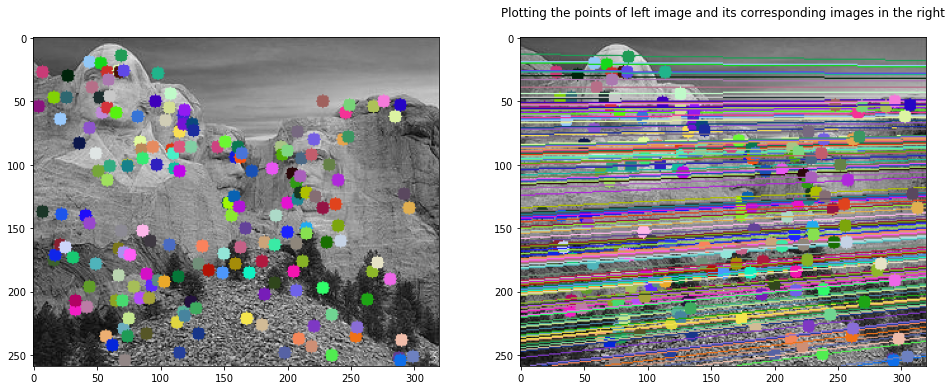

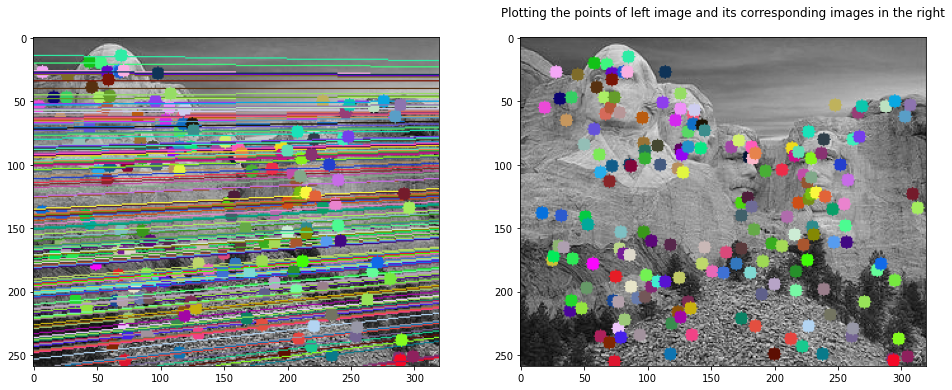

In [17]:
imgA=cv2.imread(dirPath+'1_1.jpg')
imgB=cv2.imread(dirPath+'1_2.jpg')
drawEpipolarLines(imgA,imgB,True,False)

<Figure size 720x720 with 0 Axes>

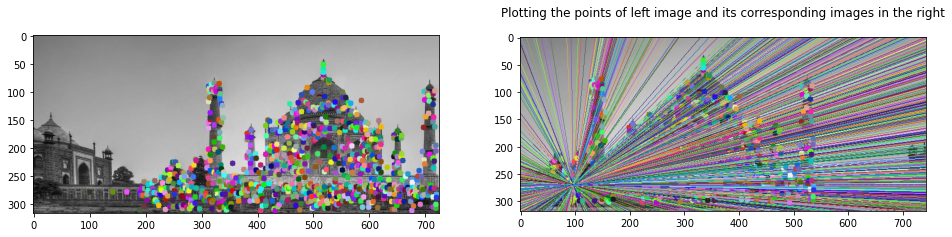

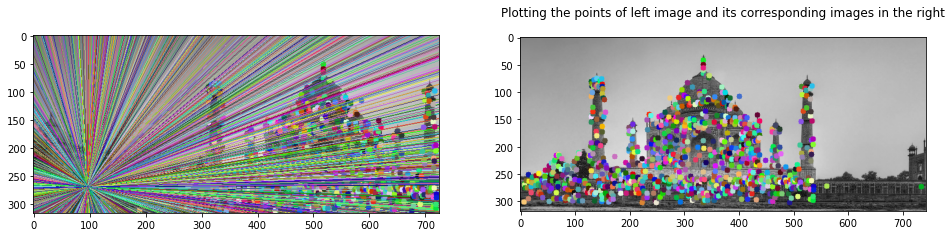

In [18]:
imgA=cv2.imread(dirPath+'2_1.png')
imgB=cv2.imread(dirPath+'2_2.png')
drawEpipolarLines(imgA,imgB,True,False)

<Figure size 720x720 with 0 Axes>

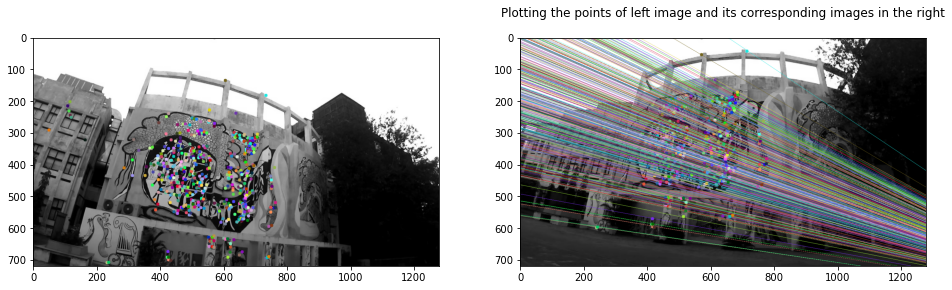

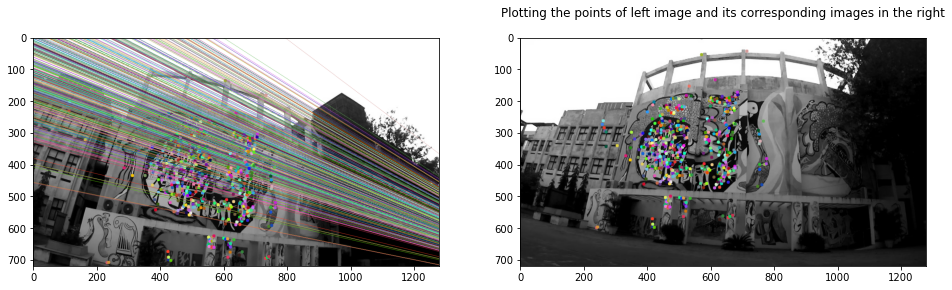

In [19]:
imgA=cv2.imread(dirPath+'3_1.jpg')
imgB=cv2.imread(dirPath+'3_2.jpg')
drawEpipolarLines(imgA,imgB,True,False)

## Question 2.3: Stereo Rectification

In [20]:
# Rectification of the image based on the fundamental matrix
def stereoRectification(img1, img2):
    # #getting the features from the feature detector
    p1, d1, p2, d2, matching_inds, top = match(img1, img2)
    plt.figure(figsize=(10, 10))
    
    
    
#     The matching coordinates and the fundamental matrix is obtained
    pts1, pts2 = findMatchingCoords(p1, p2, matching_inds)
    F,line1,line2=drawEpipolarLines(img1,img2,False,True)
    _, H1, H2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, (img1.shape[1], img1.shape[0]))
    
    #rectiify the images
    img1_rect = cv2.warpPerspective(img1, H1, (img1.shape[1], img1.shape[0]))
    img2_rect = cv2.warpPerspective(img2, H2, (img1.shape[1], img1.shape[0]))
    
    
    
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(10, 10)
    axs[0].imshow(img1_rect)
    axs[0].title.set_text("Image 1 rectified")
    axs[1].imshow(img2_rect)
    axs[1].title.set_text("Image 2 rectified")
    
    plt.show()
    return img1_rect, img2_rect

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

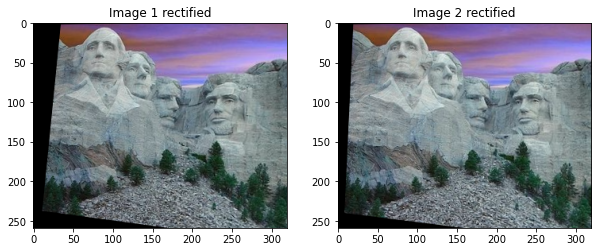

In [21]:
imgA=cv2.imread(dirPath+'1_1.jpg')
imgB=cv2.imread(dirPath+'1_2.jpg')
imgL_rect,imgR_rect=stereoRectification(imgA,imgB)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

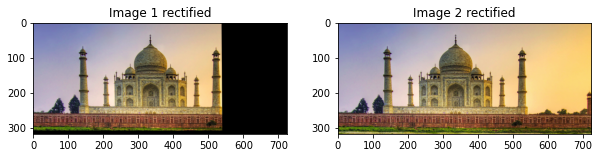

In [22]:
imgA=cv2.cvtColor(cv2.imread(dirPath+'2_1.png'),cv2.COLOR_BGR2RGB)
imgB=cv2.cvtColor(cv2.imread(dirPath+'2_2.png'),cv2.COLOR_BGR2RGB)
imgL_rect,imgR_rect=stereoRectification(imgA,imgB)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

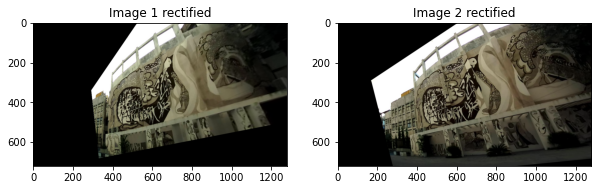

In [23]:
imgA=cv2.imread(dirPath+'3_1.jpg')
imgB=cv2.imread(dirPath+'3_2.jpg')
imgL_rect,imgR_rect=stereoRectification(imgA,imgB)

In [24]:
# Normalized correlation function
def correlation(a,b):
    na = a-np.mean(a)
    na = na/(np.linalg.norm(na)+1)
    nb = b-np.mean(b)
    nb = nb/(np.linalg.norm(nb)+1)    
    corr = abs(np.dot(na,nb))
    return corr

# Intensity Window-based correlation function  
def intensityWindowMatching(img1,img2,patch_size,step,offset=0):
    r1,c1,c = img1.shape
    r2,c2,c = img2.shape
    matches = []
    for y1 in range(0,r1-patch_size+1,step):
        for x1 in range(0,c1-patch_size+1,step):
            best_diff = -1
            for y2 in range(0,r2-patch_size+1,step):
                for x2 in range(0,c2-patch_size+1,step):
                    a = img1[y1:y1+patch_size,x1:x1+patch_size,:].flatten()
                    b = img2[y2:y2+patch_size,x2:x2+patch_size,:].flatten()
                    diff = correlation(a,b)
                    if diff>best_diff:
                        best_diff = diff
                        best_match = np.array([[x1,y1+offset],[x2,y2+offset],diff])
            matches.append(best_match)
    return matches       

In [25]:
# obtains matching points based on the epipolar lines.
def greedySterCorr(img1,img2,windowLength=32,stride=32):
    l1,w1,c1=img1.shape[0],img1.shape[1],img1.shape[2]
    l2,w2,c2=img2.shape[0],img2.shape[1],img2.shape[2]
    
    correspondeces=[]
    for patchInd in range(0,l1-windowLength,stride):
        pat1=img1[patchInd:patchInd+windowLength+1,:,:]
        pat2=img2[patchInd:patchInd+windowLength+1,:,:]
        corr=intensityWindowMatching(pat1,pat2,windowLength,stride,patchInd)
        correspondences=correspondeces+corr
    
    return correspondences

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

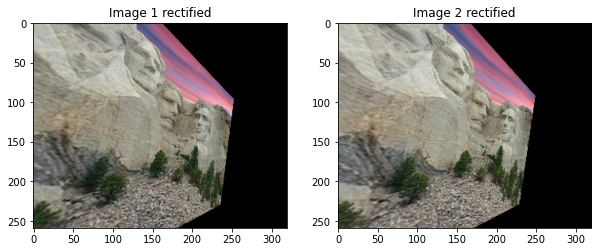

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


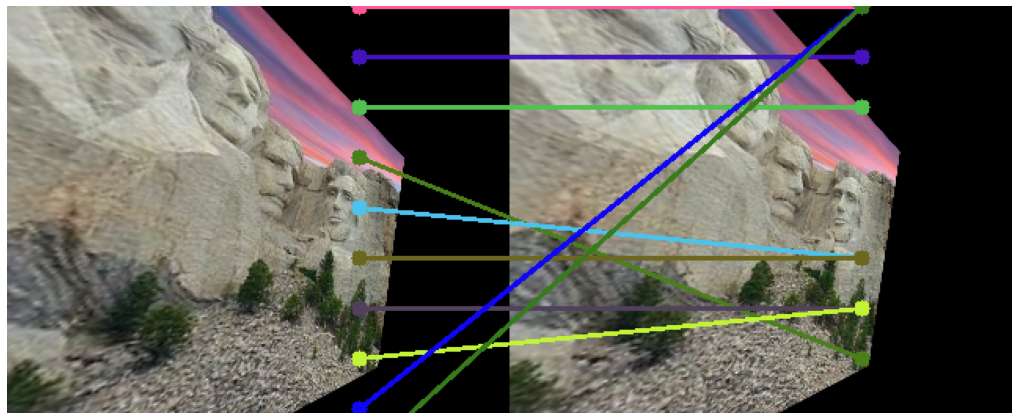

In [26]:
imgA=cv2.cvtColor(cv2.imread(dirPath+'1_1.jpg'),cv2.COLOR_BGR2RGB)
imgB=cv2.cvtColor(cv2.imread(dirPath+'1_2.jpg'),cv2.COLOR_BGR2RGB)
F,line1,line2=drawEpipolarLines(imgA,imgB,show=False,ifRet=True)
imgLrect,imgRrect=stereoRectification(imgA,imgB)
correspondences=greedySterCorr(imgLrect,imgRrect)
matchEpi=matchDraw(imgLrect,imgRrect,correspondences)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

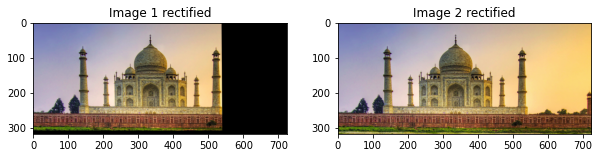

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


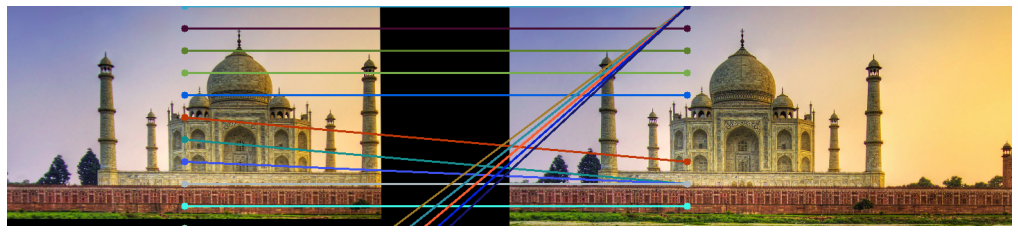

In [27]:
imgA=cv2.cvtColor(cv2.imread(dirPath+'2_1.png'),cv2.COLOR_BGR2RGB)
imgB=cv2.cvtColor(cv2.imread(dirPath+'2_2.png'),cv2.COLOR_BGR2RGB)
F,line1,line2=drawEpipolarLines(imgA,imgB,show=False,ifRet=True)
imgLrect,imgRrect=stereoRectification(imgA,imgB)
correspondences=greedySterCorr(imgLrect,imgRrect)
matchEpi=matchDraw(imgLrect,imgRrect,correspondences)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

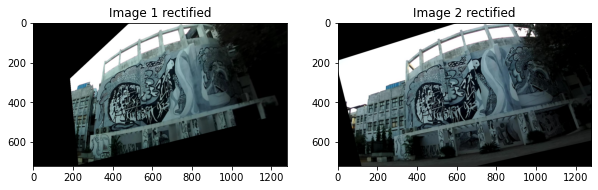

/home/krishna/.conda/envs/cvAssignment1/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


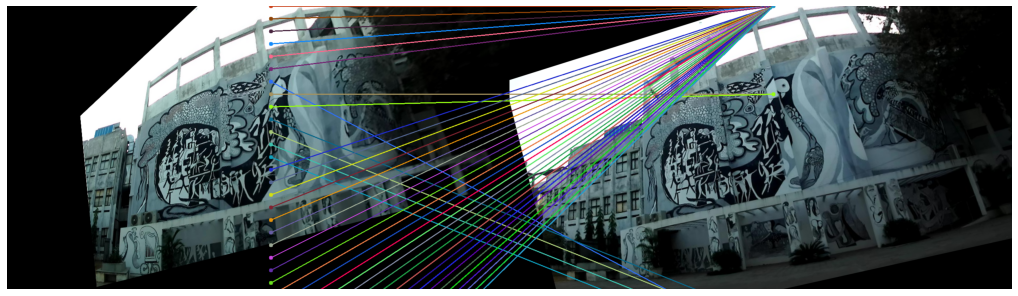

In [28]:
imgA=cv2.cvtColor(cv2.imread(dirPath+'3_1.jpg'),cv2.COLOR_BGR2RGB)
imgB=cv2.cvtColor(cv2.imread(dirPath+'3_2.jpg'),cv2.COLOR_BGR2RGB)
F,line1,line2=drawEpipolarLines(imgA,imgB,show=False,ifRet=True)
imgLrect,imgRrect=stereoRectification(imgA,imgB)
correspondences=greedySterCorr(imgLrect,imgRrect)
matchEpi=matchDraw(imgLrect,imgRrect,correspondences)

### Question 2.4: 

Brute force algorithm/intensity window based correlation method is more computationaly intensive as every patch in one image is compared to every other patch in the other image. Where as the Greedy algorithm which is used for feature matching is less computatioinaly expensive as the patches only along the epipolar lines are compared. 

From the observations it is clear that the results obtained from the greedy algorithm are more accurate and robust than the results obtained from the brute force algorithm. And so one would prefer the greedy algorithm over the brute force algorithm. 